In [23]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Tentukan direktori model dan versi model
model_dir = r"C:\Users\ASUS\Documents\EXIT\Code\models" 
model_version = 6

# Muat model
model_path = f"{model_dir}/model{model_version}.h5"
model = load_model(model_path)

print("Model loaded successfully.")

Model loaded successfully.


In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 254, 254, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 252, 252, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)       

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, log_loss

BATCH_SIZE = 32
IMAGE_SIZE = 254
CHANNELS = 3
EPOCHS = 85

n_classes = 8
class_names = dataset.class_names

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset/New/Training2",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
test_ds = dataset.skip(70)
len(test_ds)

test_ds = test_ds.skip(8)
len(test_ds)

def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(dataset)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    test_size = int(test_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

Found 2800 files belonging to 8 classes.


10/10 [==============================] - 6s 340ms/step


C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


Accuracy: 0.9013
Precision: 0.9019
Recall: 0.9013
F1 Score: 0.9009
ROC-AUC: 0.9921
Confusion Matrix:
[[39  1  0  1  1  3  0  4]
 [ 0 31  0  1  0  0  1  0]
 [ 0  0 36  0  0  0  0  0]
 [ 1  0  0 39  1  1  1  0]
 [ 2  0  0  0 32  0  1  1]
 [ 3  0  0  0  3 31  0  1]
 [ 0  0  0  0  0  0 26  0]
 [ 0  0  0  0  0  3  0 40]]
Log Loss: 0.2951


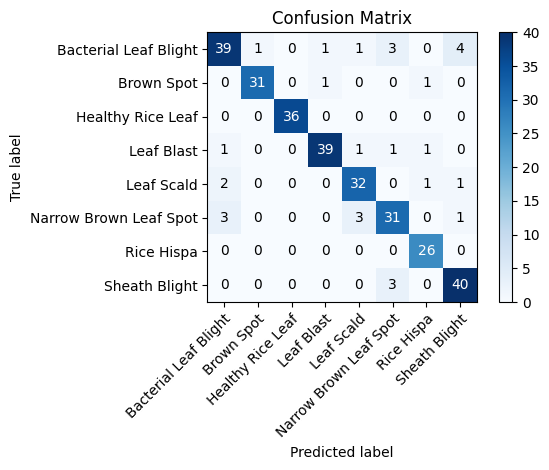

In [37]:
# Evaluasi model menggunakan metrik tambahan

def preprocess_dataset(dataset):
    images = []
    labels = []
    for image_batch, label_batch in dataset:
        images.append(image_batch.numpy())
        labels.append(label_batch.numpy())
    images = np.concatenate(images)
    labels = np.concatenate(labels)
    return images, labels

X_test, y_test = preprocess_dataset(test_ds)
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_bin = label_binarize(y_test, classes=range(n_classes))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_bin, y_pred_probs, multi_class='ovr')
conf_matrix = confusion_matrix(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_probs)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print(f'Log Loss: {log_loss_value:.4f}')

# Fungsi untuk plotting confusion matrix
def plot_confusion_matrix(cm, class_names):
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=class_names, yticklabels=class_names,
           title='Confusion Matrix',
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(conf_matrix, class_names)
plt.show() 